# Imports

In [1]:
from stardist.models import StarDist2D 
from csbdeep.utils import normalize

In [2]:
import squidpy as sq
import numpy as np
import matplotlib.pyplot as plt

# Loading pretrained StarDist2D models

In [3]:
StarDist2D.from_pretrained()

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None


# Fluorescent nuclei

In [4]:
# load the pre-processed dataset
img = sq.datasets.visium_fluo_image_crop()

In [5]:
crop = img.crop_corner(1000, 1000, size=1000)

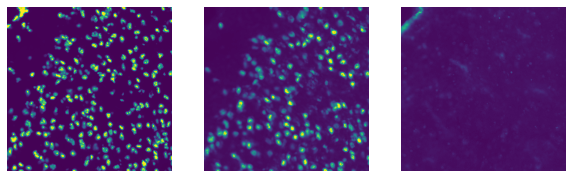

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(10, 20))
for i, ax in enumerate(axes):
    crop.show("image", channel=i, ax=ax)

In [7]:
def stardist_2D_versatile_fluo(img):
    axis_norm = (0,1)   # normalize channels independently
    img = normalize(img, 1,99.8, axis=axis_norm)
    model = StarDist2D.from_pretrained('2D_versatile_fluo')
    labels, _ = model.predict_instances(img)
    return labels

In [18]:
sq.im.segment(
    img=crop, layer="image", channel=None, method=stardist_2D_versatile_fluo, layer_added='segmented_stardist')

ValueError: Expected only `1` channel, found `3`.

ImageContainer[shape=(1000, 1000), layers=['image', 'segmented_stardist']]
Number of segments in crop: 400


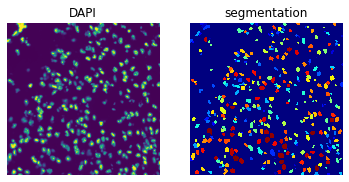

In [9]:
print(crop)
print(f"Number of segments in crop: {len(np.unique(crop['segmented_stardist']))}")

fig, axes = plt.subplots(1, 2)
crop.show("image", channel=0, ax=axes[0])
_ = axes[0].set_title("DAPI")
crop.show("segmented_stardist", cmap="jet", interpolation="none", ax=axes[1])
_ = axes[1].set_title("segmentation")

# HnE 

In [10]:
img = sq.datasets.visium_hne_image_crop()
crop = img.crop_corner(0, 0, size=1000)

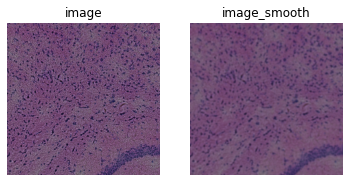

In [12]:
# smooth image
sq.im.process(crop, layer="image", method="smooth", sigma=4)

# plot the result
fig, axes = plt.subplots(1, 2)
for layer, ax in zip(["image", "image_smooth"], axes):
    crop.show(layer, ax=ax)
    ax.set_title(layer)

In [13]:
def stardist_2D_versatile_he(img, complete_img):
    axis_norm = (0,1)   # normalize channels independently
    complete_img = normalize(complete_img['image'], 1,99.8, axis=axis_norm)  # here remove complete_img and take img
    model = StarDist2D.from_pretrained('2D_versatile_he')
    labels, _ = model.predict_instances(complete_img)
    return labels

In [16]:
sq.im.segment(img=crop, layer="image", method=stardist_2D_versatile_he, layer_added='segmented_stardist', complete_img=crop)

Found model '2D_versatile_he' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.


ImageContainer[shape=(1000, 1000), layers=['image', 'image_smooth', 'segmented_stardist']]
Number of segments in crop: 183


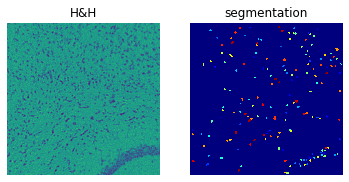

In [17]:
print(crop)
print(f"Number of segments in crop: {len(np.unique(crop['segmented_stardist']))}")

fig, axes = plt.subplots(1, 2)
crop.show("image", channel=0, ax=axes[0])
_ = axes[0].set_title("H&H")
crop.show("segmented_stardist", cmap="jet", interpolation="none", ax=axes[1])
_ = axes[1].set_title("segmentation")